#Nama : Yanu Mario
#NIM  : 21.11.3853

### Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Preprocess

In [ ]:
df = pd.read_csv("/content/Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv")

In [ ]:
df.head(5)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


In [ ]:
df.shape

(680, 8)

In [ ]:
df.columns

Index(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source',
       'Page at Source', 'Source URL'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            680 non-null    object
 1   Type             680 non-null    object
 2   Year             680 non-null    int64 
 3   Data Redundancy  680 non-null    int64 
 4   Total Deaths     680 non-null    int64 
 5   Source           680 non-null    object
 6   Page at Source   678 non-null    object
 7   Source URL       677 non-null    object
dtypes: int64(3), object(5)
memory usage: 42.6+ KB


In [ ]:
df.describe()

,Year,Data Redundancy,Total Deaths
count,680.000000,680.0,680.000000
mean,2010.560294,1.0,1415.627941
std,5.774293,0.0,7527.288815
min,2000.000000,1.0,0.000000
25%,2005.750000,1.0,4.000000
50%,2009.000000,1.0,35.500000
75%,2016.000000,1.0,298.250000
max,2022.000000,1.0,129171.000000


In [ ]:
# Membersihkan dan mengatasi data yang hilang atau duplikat (jika ada)
df.drop_duplicates(inplace=True)  # Menghapus duplikat (jika ada)
df.dropna(inplace=True)  # Menghapus baris dengan nilai NaN


### EDA

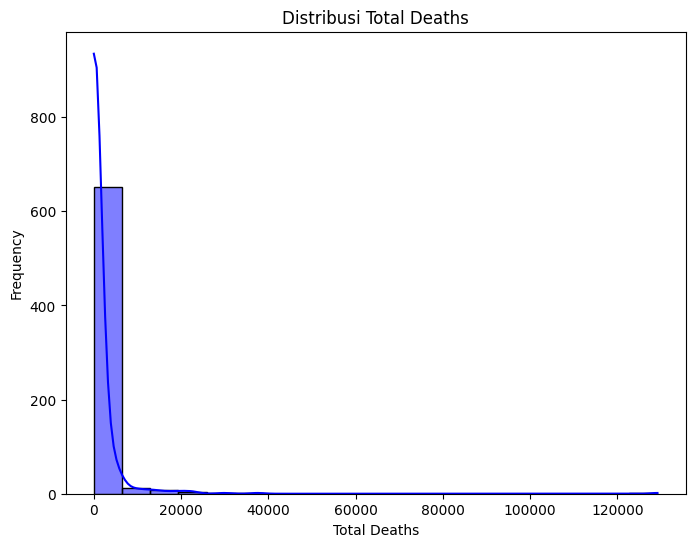

Statistik Deskriptif untuk Total Deaths:
 count       677.000000
mean       1222.680945
std        5931.534262
min           0.000000
25%           4.000000
50%          35.000000
75%         291.000000
max      129171.000000
Name: Total Deaths, dtype: float64


In [ ]:
# Statistik Deskriptif untuk variabel 'Total Deaths'
total_deaths_stats = df['Total Deaths'].describe()

# Visualisasi Distribusi Total Deaths menggunakan Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Deaths'], bins=20, kde=True, color='blue')
plt.xlabel('Total Deaths')
plt.ylabel('Frequency')
plt.title('Distribusi Total Deaths')
plt.show()

# Menampilkan Statistik Deskriptif
print("Statistik Deskriptif untuk Total Deaths:\n", total_deaths_stats)

<ipython-input-11-0e3cbbce64eb>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Total Deaths', y='Cause', data=top_20_causes, ci=None, palette='viridis')


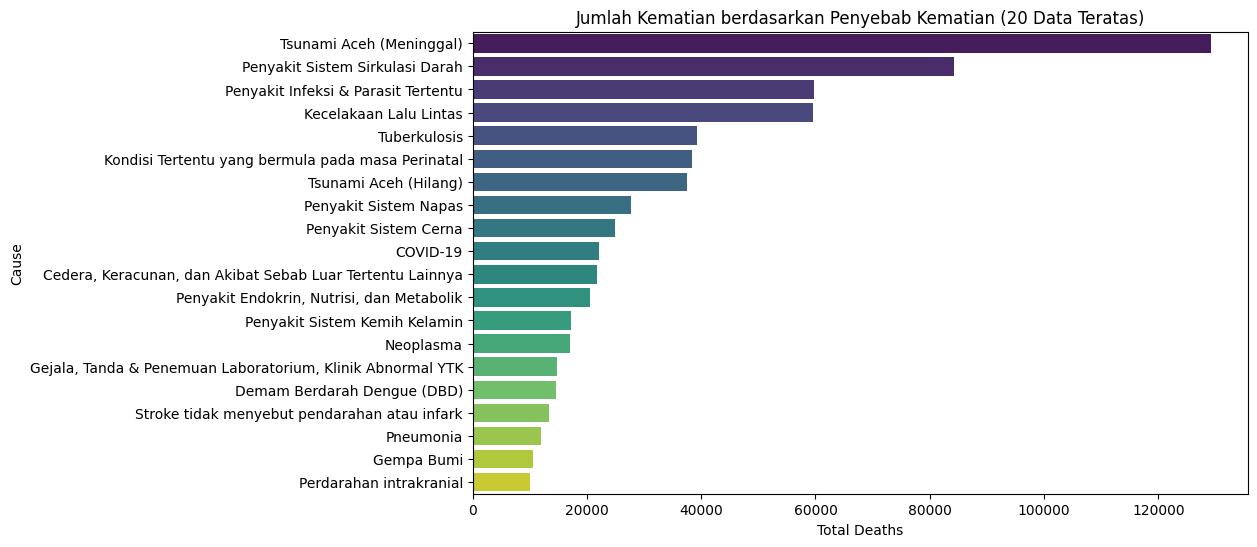

In [ ]:
# Menghitung total kematian berdasarkan penyebab (Cause)
total_deaths_by_cause = df.groupby('Cause')['Total Deaths'].sum().reset_index()

# Mengurutkan berdasarkan jumlah total kematian terbesar
total_deaths_by_cause = total_deaths_by_cause.sort_values(by='Total Deaths', ascending=False)

# Ambil 20 data teratas
top_20_causes = total_deaths_by_cause.head(20)

# Plot barplot distribusi Total Deaths berdasarkan penyebab (Cause) kematian untuk 20 data teratas
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Deaths', y='Cause', data=top_20_causes, ci=None, palette='viridis')
plt.xlabel('Total Deaths')
plt.ylabel('Cause')
plt.title('Jumlah Kematian berdasarkan Penyebab Kematian (20 Data Teratas)')
plt.show()


<ipython-input-12-cd8b498bbef7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Total Deaths', data=df, estimator=sum, ci=None, marker='o', color='purple')


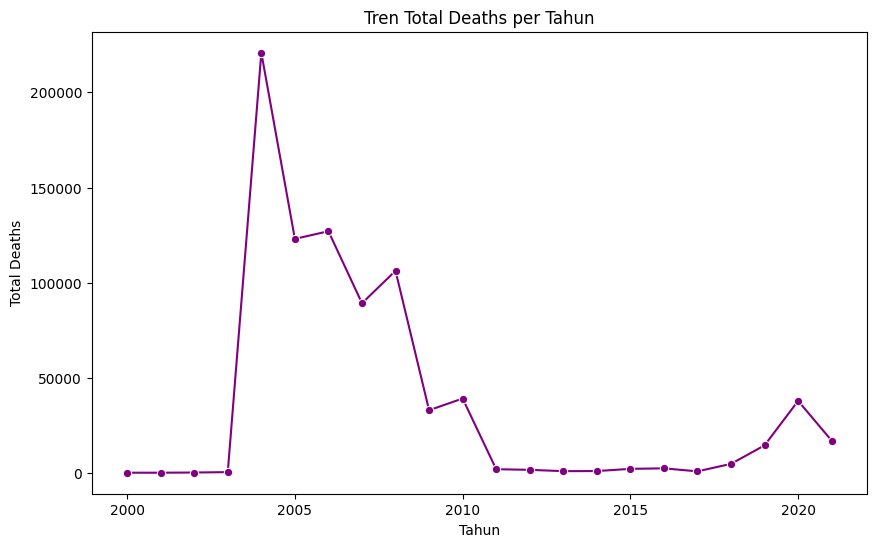

In [ ]:
# Plot Total Deaths berdasarkan tahun (Year)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Deaths', data=df, estimator=sum, ci=None, marker='o', color='purple')
plt.xlabel('Tahun')
plt.ylabel('Total Deaths')
plt.title('Tren Total Deaths per Tahun')
plt.show()

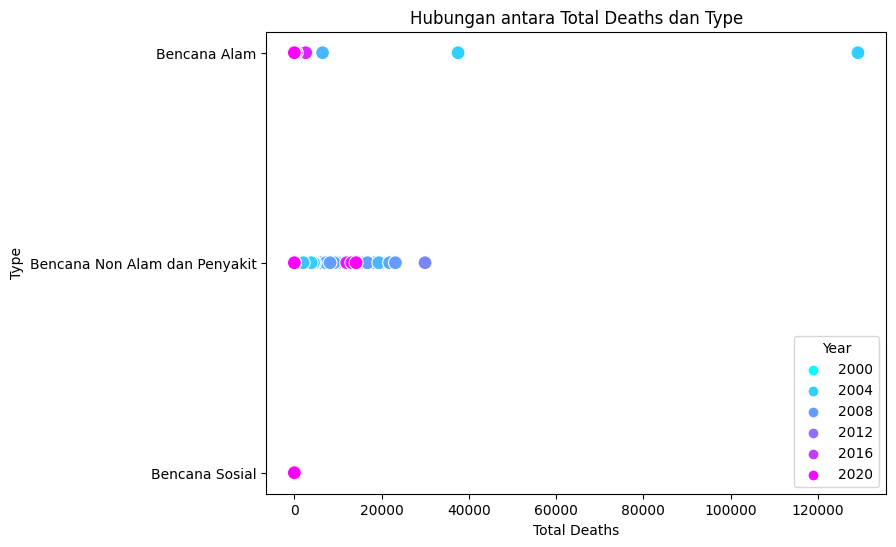

In [ ]:
# Scatter plot untuk melihat hubungan antara 'Total Deaths' dan 'Type'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Deaths', y='Type', data=df, hue='Year', palette='cool', s=100)
plt.xlabel('Total Deaths')
plt.ylabel('Type')
plt.title('Hubungan antara Total Deaths dan Type')
plt.show()

### Analisis korelasi

In [ ]:
# Label Encoding pada kolom 'Cause'
cause_encoder = LabelEncoder()
df['Cause_Convert'] = cause_encoder.fit_transform(df['Cause'])

# Label Encoding pada kolom 'Type'
type_encoder = LabelEncoder()
df['Type_Convert'] = type_encoder.fit_transform(df['Type'])

# Menampilkan hasil
print(df[['Cause', 'Cause_Convert', 'Type', 'Type_Convert']].head(5))
print(df[['Cause', 'Cause_Convert', 'Type', 'Type_Convert']].tail(5))

             Cause  Cause_Convert                           Type  Type_Convert
0  Abrasi Air Laut              1                   Bencana Alam             0
1             AIDS              0  Bencana Non Alam dan Penyakit             1
2             AIDS              0  Bencana Non Alam dan Penyakit             1
3             AIDS              0  Bencana Non Alam dan Penyakit             1
4             AIDS              0  Bencana Non Alam dan Penyakit             1
                        Cause  Cause_Convert                           Type  \
675  Wabah Penyakit (Epidemi)            180  Bencana Non Alam dan Penyakit   
676  Wabah Penyakit (Epidemi)            180  Bencana Non Alam dan Penyakit   
677  Wabah Penyakit (Epidemi)            180  Bencana Non Alam dan Penyakit   
678  Wabah Penyakit (Epidemi)            180  Bencana Non Alam dan Penyakit   
679  Wabah Penyakit (Epidemi)            180  Bencana Non Alam dan Penyakit   

     Type_Convert  
675             1  
676        

<ipython-input-15-9bcba388de43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


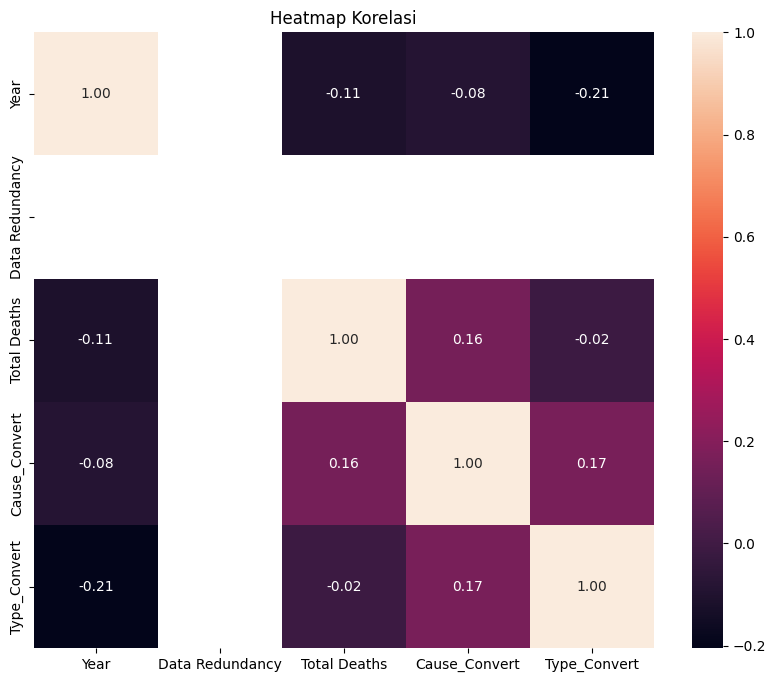

In [ ]:
# Membuat matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

### Modeling

In [ ]:
# Menentukan variabel bebas
model1 = ['Cause_Convert', 'Type_Convert', 'Year', 'Data Redundancy']

model2 = ['Cause_Convert', 'Type_Convert', 'Year',]

model3 = ['Cause_Convert', 'Type_Convert']

size = 0.2

# Memilih variabel 'Total Deaths' sebagai variabel target (Y)
y = df['Total Deaths']

In [ ]:
# Memilih model sebagai variabel prediktor (X)
X = df[model1]

# Split dataset (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=50)

# Model regresi
regr = LinearRegression()
regr.fit(X_train, y_train)

# Menghitung Root Mean Squared Error (RMSE)
pred = regr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

rmse

3012.0991370903484

In [ ]:
# Memilih model sebagai variabel prediktor (X)
X = df[model2]

# Split dataset (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=50)

# Model regresi
regr = LinearRegression()
regr.fit(X_train, y_train)

# Menghitung Root Mean Squared Error (RMSE)
pred = regr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

rmse

3012.0991370903507

In [ ]:
# Memilih model sebagai variabel prediktor (X)
X = df[model3]

# Split dataset (train, test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=50)

# Model regresi
regr = LinearRegression()
regr.fit(X_train, y_train)

# Menghitung Root Mean Squared Error (RMSE)
pred = regr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(np.array(y_test), pred))

rmse

3057.9861708331605